# Machine Learning Examination - Question 3

**DOCUMENTATION DONE AT THE VERY BOTTOM.**

In [1]:
# Imports
% matplotlib notebook
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score as r_s
from sklearn.metrics import precision_score as p_s
from sklearn.metrics import accuracy_score as a_s
from sklearn.metrics import confusion_matrix as c_m

In [2]:
# Fetch Dataset Location
data_path = '.\\Exam Datasets'
filename = 'classification_data2.txt'
data_file = os.path.join(data_path, filename)

In [3]:
# Re-Aligning the Dataset
# Initial Dataset - Tab Spaced with Few (White)Spaces
file = open(data_file, 'r') # Read File in Read-only Mode - Not in Read and Write Mode
lines = file.read().split('\n')
new_lines = []
for line in lines:
    words = line.split('\t') # Split Line by Tab
    for word in words:
        if (word == ''):
            words.remove(word) # Remove White Spaces in the Line
    new_line = []
    for w in range(len(words)):
        new_line.append(words[w])
        new_line.append(',') # Concatenate Words with a Comma
    new_lines.append(new_line[0 : -1]) # Not till End as End-Character is a Comma - So Till -1
file.close()

In [4]:
# Save The New Lines as New File with CSV Extention
new_filename = filename.split('.')
new_filename = new_filename[0] + '.csv'
new_file = os.path.join(data_path, new_filename)

In [5]:
# Create the New File After Removing Tabs and Spaces
file = open(new_file, 'w') # Write File in Write-only mode - Not in Append Mode - File is Made Everytime
for nl in new_lines:
    nline = ''.join(nl)
    file.write(nline + '\n')
file.close()

In [6]:
# Selecting Columns for Dataset - Feature Selection
cols = ['area', 'perimeter', 
        'compactness', 'kernel_length', 'kernel_width', 
        'asym', 'groove_length', 
        'type']

In [7]:
# Get the New Dataset
dataset = pd.read_csv(new_file, usecols=cols)

<IPython.core.display.Javascript object>


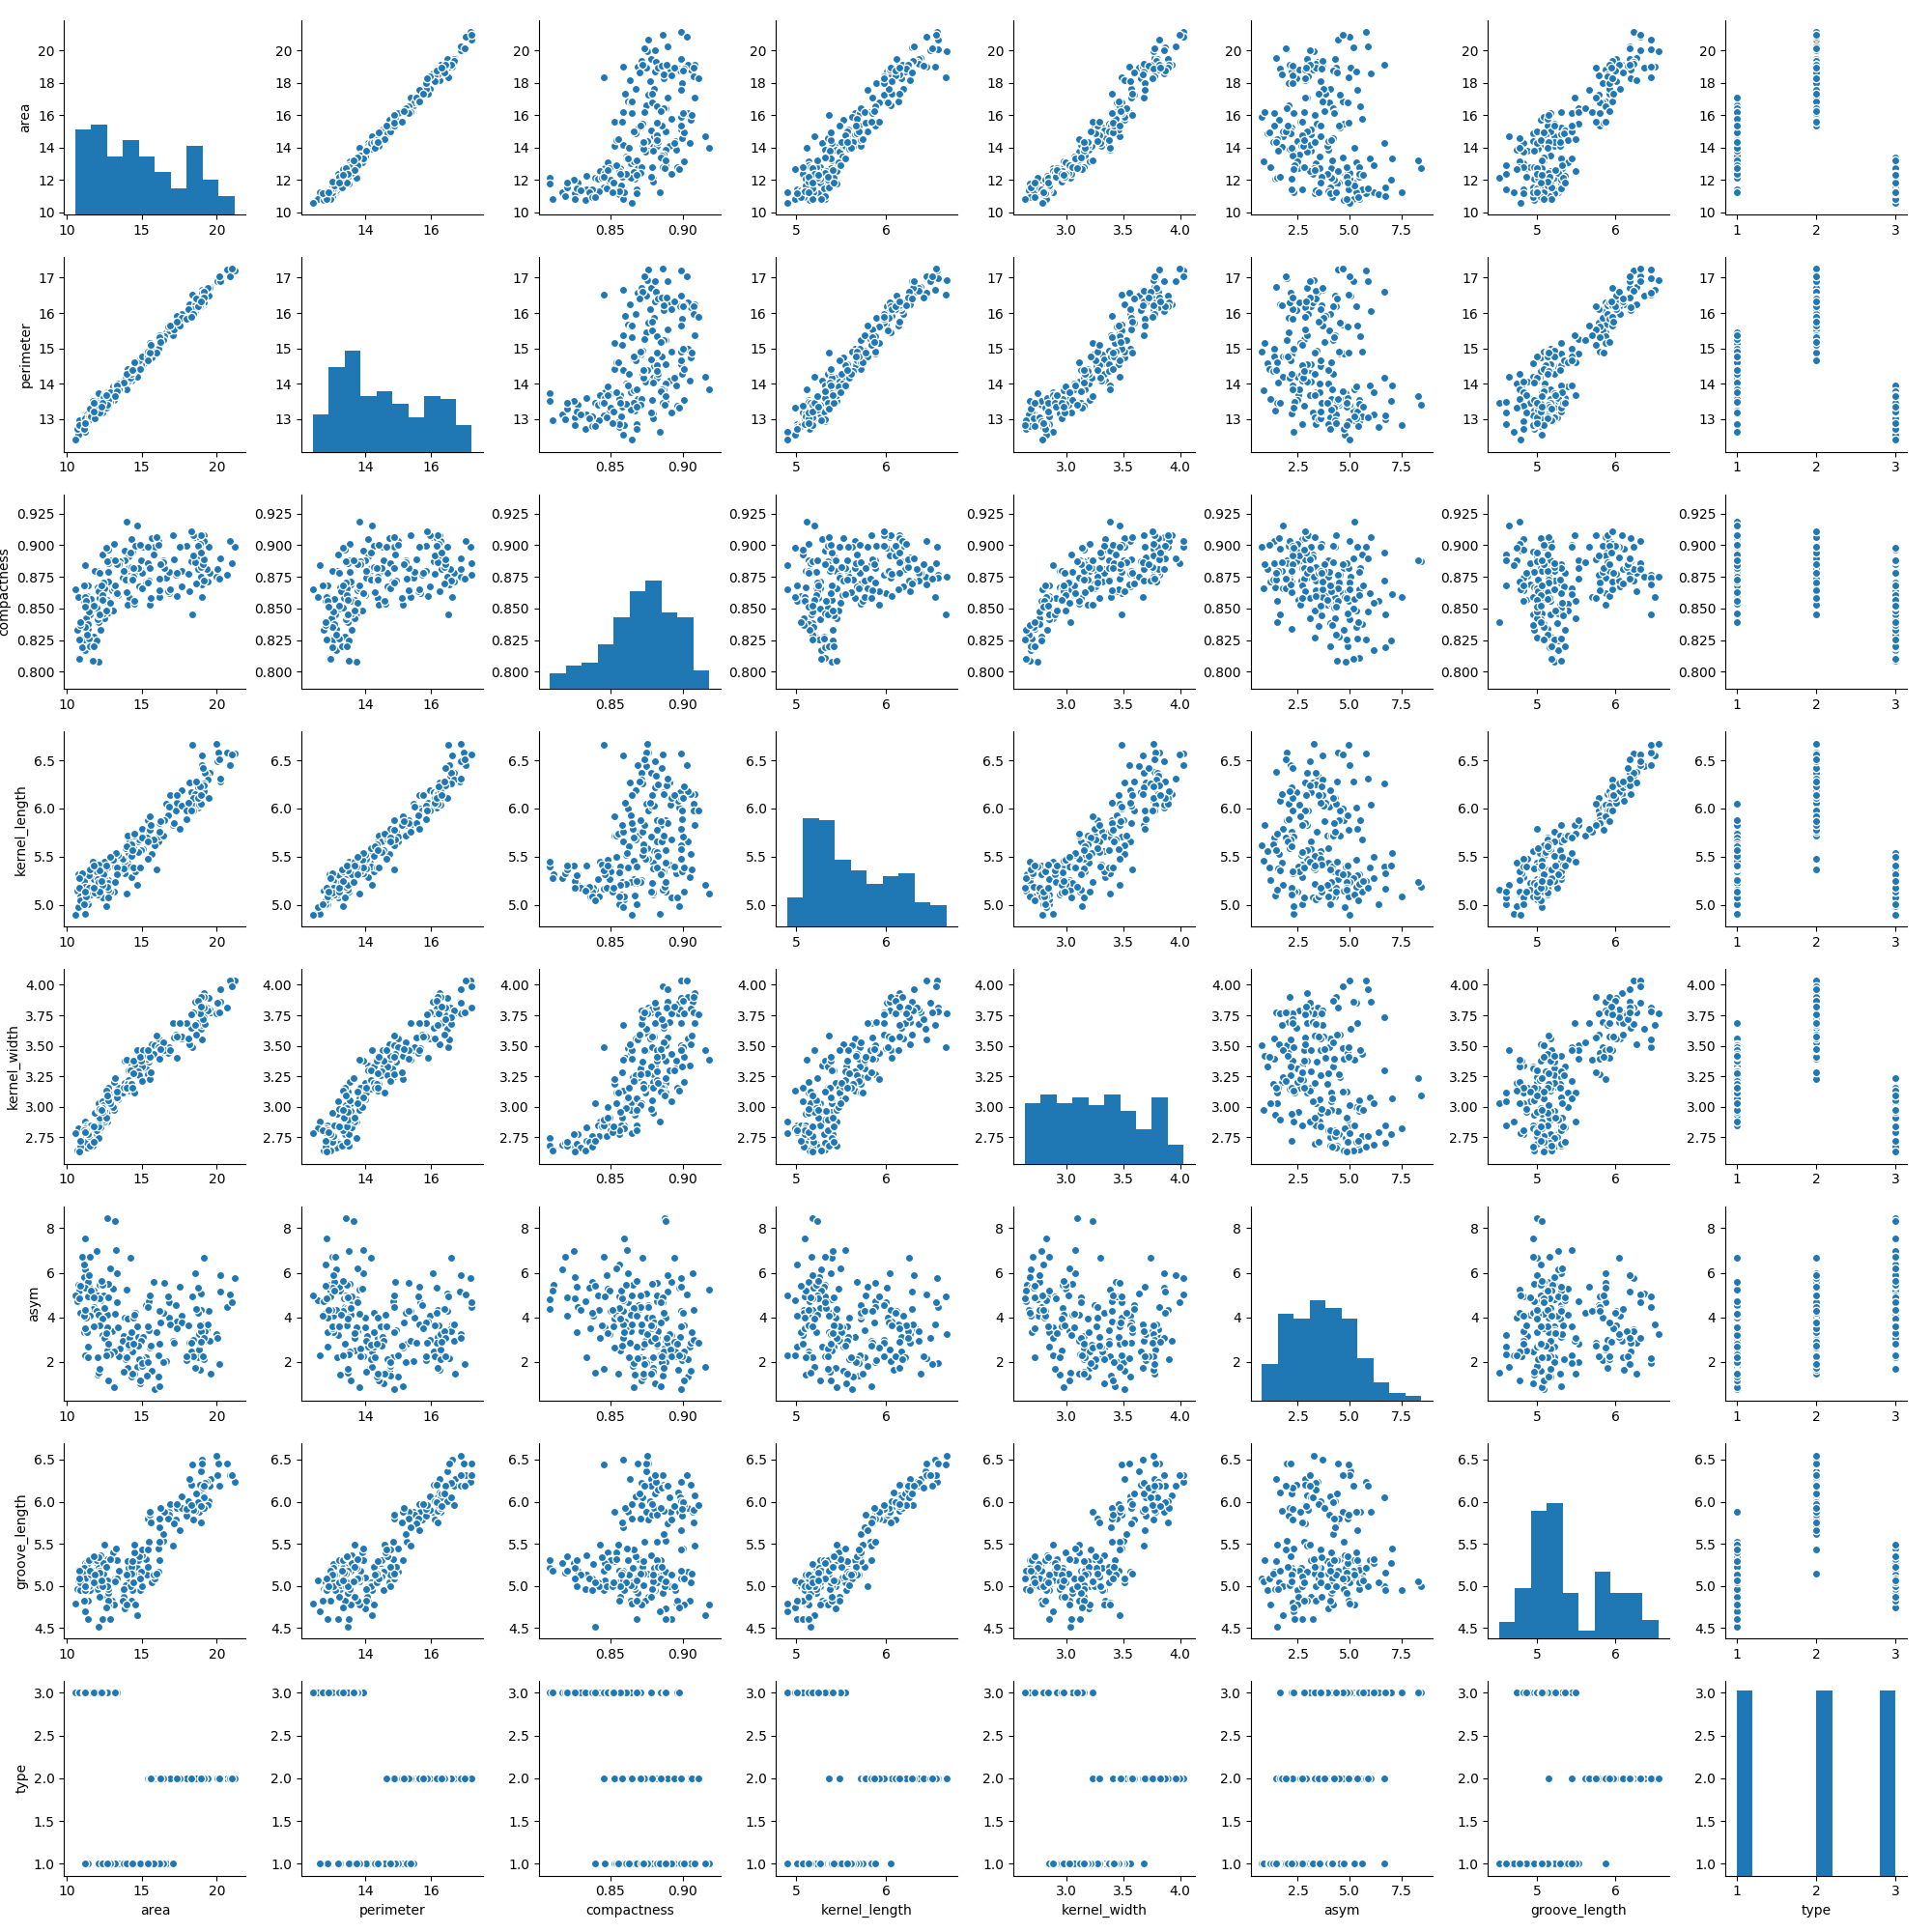

In [8]:
# Plot Dataset
sns.pairplot(dataset) # Scatters and Histograms

In [9]:
# Dataset Visualization and Analysis
data_head = dataset.head()
print ('\n Dataset Head :')
print (data_head)
data_tail = dataset.tail()
print ('\n Dataset Tail :')
print (data_tail)
data_desc = dataset.describe()
print ('\n Dataset Description :')
print (data_desc)
data_corr = dataset.corr()
print ('\n Dataset Correlation :')
print (data_corr)


 Dataset Head :
    area  perimeter  compactness  kernel_length  kernel_width   asym  \
0  15.26      14.84       0.8710          5.763         3.312  2.221   
1  14.88      14.57       0.8811          5.554         3.333  1.018   
2  14.29      14.09       0.9050          5.291         3.337  2.699   
3  13.84      13.94       0.8955          5.324         3.379  2.259   
4  16.14      14.99       0.9034          5.658         3.562  1.355   

   groove_length  type  
0          5.220     1  
1          4.956     1  
2          4.825     1  
3          4.805     1  
4          5.175     1  

 Dataset Tail :
      area  perimeter  compactness  kernel_length  kernel_width   asym  \
205  12.19      13.20       0.8783          5.137         2.981  3.631   
206  11.23      12.88       0.8511          5.140         2.795  4.325   
207  13.20      13.66       0.8883          5.236         3.232  8.315   
208  11.84      13.21       0.8521          5.175         2.836  3.598   
209  12.30   

<IPython.core.display.Javascript object>


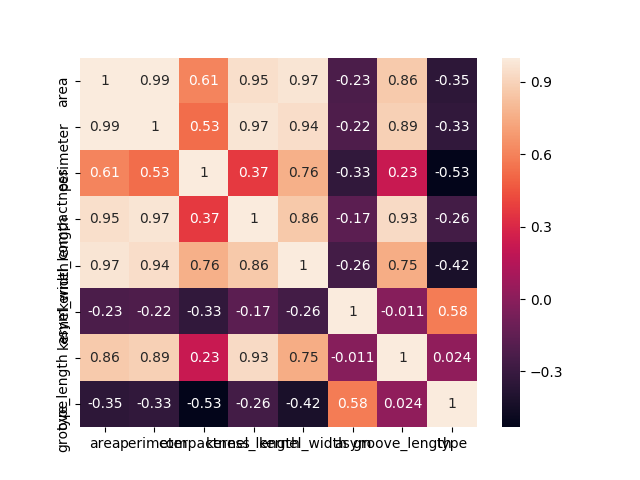

In [10]:
# HeatMap Figure of Correlation of Selected Features
plt.figure()
sns.heatmap(data_corr, annot=True)

In [11]:
# Shuffling Dataset to Desquence any Ordered Data
dataset = shuffle(dataset)

In [12]:
#  A Function to Split Dataset to Train and Test Sets
def train_test_split(dataset):
    percent = 0.80
    data_train = dataset[ : int(percent * dataset.shape[0])]
    data_test = dataset[int(percent * dataset.shape[0]) : ]
    return data_train, data_test

In [13]:
# A Function to Split Passed Dataset to K-Folds.
def split_kfold(dataset, folds):
    l = dataset.shape[0]
    s = (1.0 / folds)
    splits = []
    for k in range(folds):
        split = dataset[int(k * s * l) : int((k + 1) * s * l)]
        splits.append(split)
    return splits

In [14]:
# A Function to Obtain the Features and Target List
def get_X_Y(dataset):
    X = np.asarray([[row['area'], row['perimeter'], 
                     row['compactness'], row['kernel_length'], 
                     row['kernel_width'], row['asym'], 
                     row['groove_length']] for index, row in dataset.iterrows()])
    Y = np.asarray([row['type'] for index, row in dataset.iterrows()])
    return X, Y

In [15]:
# Spliting the Dataset
# Initial Split of Dataset to Train and Test
data_cv, data_test = train_test_split(dataset)
# Obtaining Cross Validation Splits for CV Dataset
cv_splits = split_kfold(data_cv, 5)
# Obtaining Train Features and Target
cv_train_X, cv_train_Y = get_X_Y(data_cv)
# Obtaining Test Features and Target
test_X, test_Y = get_X_Y(data_test)

**Linear Kernel Ridge Regression - Classification**

In [16]:
# Linear Kernel Ridge Regression
print ()
# Functions and Parameters
alphas = [1.0]
hyperparams = {'alpha' : alphas}
lin_krr = KernelRidge(alpha=alphas, kernel='linear')
# Linear KRR Initializer
lin_krr_clf = GridSearchCV(lin_krr, hyperparams, cv=5)

In [17]:
# Train
tl = time.time()
lin_krr_fit = lin_krr_clf.fit(cv_train_X, cv_train_Y)
tl = time.time() - tl
print ('Time Taken To Train : %f Secs.' % tl)
lin_krr_res = lin_krr_clf.cv_results_
print ('Linear KRR CV Results : \n', lin_krr_res)
lin_krr_params = lin_krr_clf.best_params_
print ('Linear KRR Best Parameters : \n', lin_krr_params)
lin_krr_score = lin_krr_clf.best_score_
print ('Linear KRR Best Score : \n', lin_krr_score)
print ()

Time Taken To Train : 0.060394 Secs.
Linear KRR CV Results : 
 {'mean_fit_time': array([ 0.01047912]), 'std_fit_time': array([ 0.01214501]), 'mean_score_time': array([ 0.]), 'std_score_time': array([ 0.]), 'param_alpha': masked_array(data = [1.0],
             mask = [False],
       fill_value = ?)
, 'params': [{'alpha': 1.0}], 'split0_test_score': array([ 0.70295149]), 'split1_test_score': array([ 0.71331523]), 'split2_test_score': array([ 0.57227528]), 'split3_test_score': array([ 0.56710435]), 'split4_test_score': array([ 0.65241216]), 'mean_test_score': array([ 0.64199091]), 'std_test_score': array([ 0.06235511]), 'rank_test_score': array([1]), 'split0_train_score': array([ 0.65199245]), 'split1_train_score': array([ 0.65257639]), 'split2_train_score': array([ 0.68663588]), 'split3_train_score': array([ 0.6864324]), 'split4_train_score': array([ 0.67291524]), 'mean_train_score': array([ 0.67011047]), 'std_train_score': array([ 0.01538225])}
Linear KRR Best Parameters : 
 {'alpha': 

In [18]:
# Test and Results
tl = time.time()
test_pred = lin_krr_clf.predict(test_X)
tl = time.time() - tl
print ('Time Taken To Test : %f Secs.' % tl)
# Round Test Predictions to Avoid Multiclass Continuous Targets Error
test_pred = np.round(test_pred)
# The Best Estimator
print ('Test Estimator : \n', lin_krr_clf.best_estimator_)
# Recall Score
recall = r_s(test_Y, test_pred, average='micro')
print ('Recall Score : \n', recall)
# Precision Score
precision = p_s(test_Y, test_pred, average='micro')
print ('Precision Score : \n', precision)
# Accuracy Score
accuracy = a_s(test_Y, test_pred)
print ('Accuracy Score : \n', accuracy)
# Confusion Matix
print ('Confusion Matrix : \n', c_m(test_Y, test_pred))
print ()

Time Taken To Test : 0.004001 Secs.
Test Estimator : 
 KernelRidge(alpha=1.0, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None)
Recall Score : 
 0.690476190476
Precision Score : 
 0.690476190476
Accuracy Score : 
 0.690476190476
Confusion Matrix : 
 [[ 9  4  0]
 [ 4 12  0]
 [ 0  5  8]]



**Polynomial Kernel Ridge Regression - Classification**

In [19]:
# Polynomial Kernel Ridge Regression
print ()
# Functions and Parameters
alphas = [1.0]
degs = [2.0, 3.0, 4.0] # M
hyperparams = {'alpha' : alphas, 'degree' : degs}
poly_krr = KernelRidge(kernel='poly', alpha=alphas, degree=degs, gamma=1, coef0=1)
# Polynomial KRR Initializer
poly_krr_clf = GridSearchCV(poly_krr, hyperparams, cv=5)

In [20]:
# Train
tp = time.time()
poly_krr_fit = poly_krr_clf.fit(cv_train_X, cv_train_Y)
tp = time.time() - tp
print ('Time Taken To Train : %f Secs.' % tp)
poly_krr_res = poly_krr_clf.cv_results_
print ('Polynomial KRR CV Results : \n', poly_krr_res)
poly_krr_params = poly_krr_clf.best_params_
print ('Polynomial KRR Best Parameters : \n', poly_krr_params)
poly_krr_score = poly_krr_clf.best_score_
print ('Polynomial KRR Best Score : \n', poly_krr_score)
print ()

Time Taken To Train : 0.123133 Secs.
Polynomial KRR CV Results : 
 {'mean_fit_time': array([ 0.00358133,  0.00480046,  0.00400028]), 'std_fit_time': array([  1.93717282e-03,   1.59983641e-03,   2.86102295e-07]), 'mean_score_time': array([ 0.,  0.,  0.]), 'std_score_time': array([ 0.,  0.,  0.]), 'param_alpha': masked_array(data = [1.0 1.0 1.0],
             mask = [False False False],
       fill_value = ?)
, 'param_degree': masked_array(data = [2.0 3.0 4.0],
             mask = [False False False],
       fill_value = ?)
, 'params': [{'alpha': 1.0, 'degree': 2.0}, {'alpha': 1.0, 'degree': 3.0}, {'alpha': 1.0, 'degree': 4.0}], 'split0_test_score': array([ 0.81568028,  0.8237147 ,  0.63297083]), 'split1_test_score': array([ 0.73571  ,  0.6978295,  0.3514951]), 'split2_test_score': array([ 0.70005588,  0.68070293,  0.33542279]), 'split3_test_score': array([ 0.6441896 ,  0.5965457 ,  0.38182684]), 'split4_test_score': array([ 0.73168141,  0.77542144,  0.54693723]), 'mean_test_score': arra

In [21]:
# Test and Results
tp = time.time()
test_pred = poly_krr_clf.predict(test_X)
tp = time.time() - tp
print ('Time Taken To Test : %f Secs.' % tp)
# Round Test Predictions to Avoid Multiclass Continuous Targets Error
test_pred = np.round(test_pred)
# The Best Estimator
print ('Test Estimator : \n', poly_krr_clf.best_estimator_)
# Recall Score
recall = r_s(test_Y, test_pred, average='micro')
print ('Recall Score : \n', recall)
# Precision Score
precision = p_s(test_Y, test_pred, average='micro')
print ('Precision Score : \n', precision)
# Accuracy Score
accuracy = a_s(test_Y, test_pred)
print ('Accuracy Score : \n', accuracy)
# Confusion Matix
print ('Confusion Matrix : \n', c_m(test_Y, test_pred))
print ()

Time Taken To Test : 0.000000 Secs.
Test Estimator : 
 KernelRidge(alpha=1.0, coef0=1, degree=2.0, gamma=1, kernel='poly',
      kernel_params=None)
Recall Score : 
 0.857142857143
Precision Score : 
 0.857142857143
Accuracy Score : 
 0.857142857143
Confusion Matrix : 
 [[11  2  0]
 [ 0 16  0]
 [ 0  4  9]]



**Gaussian/RBF Kernel Ridge Regression - Classification**

In [22]:
# Gaussian/RBF Kernel Ridge Regression
print ()
# Functions and Parameters
alphas = [1.0]
sigmas = [0.1, 0.5, 1.0, 2.0, 4.0]
hyperparams = {'alpha' : alphas, 'gamma' : sigmas}
rbf_krr = KernelRidge(kernel='rbf', alpha=alphas, gamma=sigmas)
# Gaussian/RBF KRR Initializer
rbf_krr_clf = GridSearchCV(rbf_krr, hyperparams, cv=5)

In [23]:
# Train
tg = time.time()
rbf_krr_fit = rbf_krr_clf.fit(cv_train_X, cv_train_Y)
tg = time.time() - tg
print ('Time Taken To Train : %f Secs.' % tg)
rbf_krr_res = rbf_krr_clf.cv_results_
print ('Gaussian KRR CV Results : \n', rbf_krr_res)
rbf_krr_params = rbf_krr_clf.best_params_
print ('Gaussian KRR Best Parameters : \n', rbf_krr_params)
rbf_krr_score = rbf_krr_clf.best_score_
print ('Gaussian KRR Best Score : \n', rbf_krr_score)
print ()

Time Taken To Train : 0.186142 Secs.
Gaussian KRR CV Results : 
 {'mean_fit_time': array([ 0.00480084,  0.00399976,  0.        ,  0.0081882 ,  0.00320034]), 'std_fit_time': array([  2.99361877e-03,   3.36972422e-06,   0.00000000e+00,
         6.93418648e-03,   1.60017122e-03]), 'mean_score_time': array([ 0.00079999,  0.        ,  0.        ,  0.00079694,  0.00240045]), 'std_score_time': array([ 0.00159998,  0.        ,  0.        ,  0.00159388,  0.00195996]), 'param_alpha': masked_array(data = [1.0 1.0 1.0 1.0 1.0],
             mask = [False False False False False],
       fill_value = ?)
, 'param_gamma': masked_array(data = [0.1 0.5 1.0 2.0 4.0],
             mask = [False False False False False],
       fill_value = ?)
, 'params': [{'alpha': 1.0, 'gamma': 0.1}, {'alpha': 1.0, 'gamma': 0.5}, {'alpha': 1.0, 'gamma': 1.0}, {'alpha': 1.0, 'gamma': 2.0}, {'alpha': 1.0, 'gamma': 4.0}], 'split0_test_score': array([ 0.80749341,  0.59777869,  0.22059529, -0.47991983, -1.73701064]), 'split1

In [24]:
# Test and Results
tg = time.time()
test_pred = rbf_krr_clf.predict(test_X)
tg = time.time() - tg
print ('Time Taken To Test : %f Secs.' % tg)
# Round Test Predictions to Avoid Multiclass Continuous Targets Error
test_pred = np.round(test_pred)
# The Best Estimator
print ('Test Estimator : \n', rbf_krr_clf.best_estimator_)
# Recall Score
recall = r_s(test_Y, test_pred, average='micro')
print ('Recall Score : \n', recall)
# Precision Score
precision = p_s(test_Y, test_pred, average='micro')
print ('Precision Score : \n', precision)
# Accuracy Score
accuracy = a_s(test_Y, test_pred)
print ('Accuracy Score : \n', accuracy)
# Confusion Matix
print ('Confusion Matrix : \n', c_m(test_Y, test_pred))
print ()

Time Taken To Test : 0.000000 Secs.
Test Estimator : 
 KernelRidge(alpha=1.0, coef0=1, degree=3, gamma=0.1, kernel='rbf',
      kernel_params=None)
Recall Score : 
 0.785714285714
Precision Score : 
 0.785714285714
Accuracy Score : 
 0.785714285714
Confusion Matrix : 
 [[10  3  0]
 [ 1 15  0]
 [ 0  5  8]]



**Logistic Regression - Classification**

In [25]:
# Logistic Regression
# However Dataset is Not Large in this Case, 'sag' is used as better solver.
lr = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=500) # LogR Initializer

In [26]:
# Train
tlr = time.time()
print ()
recs, precs, accs = [], [], []
for i in range(len(cv_splits)):
    print ('CV Epoch : ' + str(i + 1))
    cv_train, cv_test = train_test_split(cv_splits[i])
    cv_train_X, cv_train_Y = get_X_Y(cv_train)
    cv_test_X, cv_test_Y = get_X_Y(cv_test)
    lr_fit = lr.fit(cv_train_X, cv_train_Y)
    cv_pred = lr.predict(cv_test_X)
    # The Coefficients
    print ('Coefficients : \n', lr.coef_)
    # Round Test Predictions to Avoid Multiclass Continuous Targets Error
    cv_pred = np.round(cv_pred)
    # Recall Score
    recall = r_s(cv_test_Y, cv_pred, average='micro')
    print ('Recall Score : \n', recall)
    # Precision Score
    precision = p_s(cv_test_Y, cv_pred, average='micro')
    print ('Precision Score : \n', precision)
    # Accuracy Score
    accuracy = a_s(cv_test_Y, cv_pred)
    print ('Accuracy Score : \n', accuracy)
    # Conusion Matix
    print ('Confusion Matrix : \n', c_m(cv_test_Y, cv_pred))
    recs.append(recall)
    precs.append(precision)
    accs.append(accuracy)
    print ()
tlr = time.time() - tlr
print ('Time Taken To Train : %f Secs.' % tlr)


CV Epoch : 1
Coefficients : 
 [[ 0.03332432  0.2372733   0.06816226  0.07581083  0.21076545 -0.33711135
  -0.63181941]
 [ 1.22319819 -0.94851296 -0.18446578 -0.50502141 -0.23209053  0.10946489
  -0.11268537]
 [-1.25652252  0.71123966  0.11630352  0.42921059  0.02132508  0.22764645
   0.74450478]]
Recall Score : 
 1.0
Precision Score : 
 1.0
Accuracy Score : 
 1.0
Confusion Matrix : 
 [[3 0 0]
 [0 2 0]
 [0 0 2]]

CV Epoch : 2
Coefficients : 
 [[-0.09325187  0.43861086  0.13057933  0.09231986  0.32222535 -0.55835931
  -0.80334052]
 [ 1.19118536 -0.95708835 -0.19234153 -0.5155765  -0.24194567  0.13643434
   0.11358021]
 [-1.09793349  0.51847749  0.0617622   0.42325664 -0.08027968  0.42192497
   0.68976031]]
Recall Score : 
 0.857142857143
Precision Score : 
 0.857142857143
Accuracy Score : 
 0.857142857143
Confusion Matrix : 
 [[3 1 0]
 [0 0 0]
 [0 0 3]]

CV Epoch : 3
Coefficients : 
 [[ -2.52117101e-01   3.92575008e-01   1.08442121e-01   1.10916608e-01
    3.12512771e-01  -3.79778909e-0

C:\Users\GirishKumarK\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [27]:
# Calculation of Average Metrics after CV
print ('Average Recall Score : %f' % np.mean(recs))
print ('Average Precision Score : %f' % np.mean(precs))
print ('Average Accuracy Score : %f' % np.mean(accs))
print ()

Average Recall Score : 0.942857
Average Precision Score : 0.942857
Average Accuracy Score : 0.942857



In [28]:
# Test and Results
tlr = time.time()
test_pred = lr.predict(test_X)
tlr = time.time() - tlr
print ('Time Taken To Test : %f Secs.' % tlr)
# Round Test Predictions to Avoid Multiclass Continuous Targets Error
test_pred = np.round(test_pred)
# The Coefficients
print ('Test Coefficients : \n', lr.coef_)
# Recall Score
recall = r_s(test_Y, test_pred, average='micro')
print ('Recall Score : \n', recall)
# Precision Score
precision = p_s(test_Y, test_pred, average='micro')
print ('Precision Score : \n', precision)
# Accuracy Score
accuracy = a_s(test_Y, test_pred)
print ('Accuracy Score : \n', accuracy)
# Conusion Matix
print ('Confusion Matrix : \n', c_m(test_Y, test_pred))
print ()

Time Taken To Test : 0.000000 Secs.
Test Coefficients : 
 [[-0.0674131   0.36937483  0.11948645  0.10658842  0.29933702 -0.55460297
  -0.7405802 ]
 [ 1.1953149  -0.92382529 -0.20410663 -0.46681071 -0.27346105 -0.18447046
   0.18106392]
 [-1.1279018   0.55445046  0.08462018  0.36022229 -0.02587597  0.73907344
   0.55951628]]
Recall Score : 
 0.952380952381
Precision Score : 
 0.952380952381
Accuracy Score : 
 0.952380952381
Confusion Matrix : 
 [[12  1  0]
 [ 0 16  0]
 [ 1  0 12]]



**Linear Support Vector Machine Classification - Hard Margin**

In [29]:
# Linear Support Vector Classification
print ()
# Functions and Parameters
cs = [100000.0]
lin_svc = SVC(C=cs, kernel='linear', cache_size=4096)
hyperparams = {'C' : cs}
# Linear SVC Initializer
lin_svc_clf = GridSearchCV(lin_svc, hyperparams, cv=5)

In [30]:
# Train
tl = time.time()
lin_svc_fit = lin_svc_clf.fit(cv_train_X, cv_train_Y)
tl = time.time() - tl
print ('Time Taken To Train : %f Secs.' % tl)
lin_svc_res = lin_svc_clf.cv_results_
print ('Linear SVC CV Results : \n', lin_svc_res)
lin_svc_params = lin_svc_clf.best_params_
print ('Linear SVC Best Parameters : \n', lin_svc_params)
lin_svc_score = lin_svc_clf.best_score_
print ('Linear SVC Best Score : \n', lin_svc_score)
print ()

Time Taken To Train : 0.024020 Secs.
Linear SVC CV Results : 
 {'mean_fit_time': array([ 0.00160027]), 'std_fit_time': array([ 0.00195992]), 'mean_score_time': array([ 0.]), 'std_score_time': array([ 0.]), 'param_C': masked_array(data = [100000.0],
             mask = [False],
       fill_value = ?)
, 'params': [{'C': 100000.0}], 'split0_test_score': array([ 1.]), 'split1_test_score': array([ 0.83333333]), 'split2_test_score': array([ 0.83333333]), 'split3_test_score': array([ 0.8]), 'split4_test_score': array([ 0.75]), 'mean_test_score': array([ 0.85185185]), 'std_test_score': array([ 0.08405041]), 'rank_test_score': array([1]), 'split0_train_score': array([ 1.]), 'split1_train_score': array([ 1.]), 'split2_train_score': array([ 1.]), 'split3_train_score': array([ 1.]), 'split4_train_score': array([ 1.]), 'mean_train_score': array([ 1.]), 'std_train_score': array([ 0.])}
Linear SVC Best Parameters : 
 {'C': 100000.0}
Linear SVC Best Score : 
 0.851851851852



In [31]:
# Test and Results
tl = time.time()
test_pred = lin_svc_clf.predict(test_X)
tl = time.time() - tl
print ('Time Taken To Test : %f Secs.' % tl)
# Round Test Predictions to Avoid Multiclass Continuous Targets Error
test_pred = np.round(test_pred)
# The Best Estimator
print ('Test Estimator : \n', lin_svc_clf.best_estimator_)
# Recall Score
recall = r_s(test_Y, test_pred, average='micro')
print ('Recall Score : \n', recall)
# Precision Score
precision = p_s(test_Y, test_pred, average='micro')
print ('Precision Score : \n', precision)
# Accuracy Score
accuracy = a_s(test_Y, test_pred)
print ('Accuracy Score : \n', accuracy)
# Confusion Matix
print ('Confusion Matrix : \n', c_m(test_Y, test_pred))
print ()

Time Taken To Test : 0.000000 Secs.
Test Estimator : 
 SVC(C=100000.0, cache_size=4096, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Recall Score : 
 0.880952380952
Precision Score : 
 0.880952380952
Accuracy Score : 
 0.880952380952
Confusion Matrix : 
 [[ 9  2  2]
 [ 0 16  0]
 [ 1  0 12]]



**Polynomial Support Vector Machine Classification - Hard Margin**

In [32]:
# Polynomial Support Vector Classification
print ()
# Functions and Parameters
cs = [100000.0]
degs = [2.0, 3.0, 4.0] # M
poly_svc = SVC(kernel='poly', C=cs, degree=degs, gamma=1, coef0=1, cache_size=4096)
hyperparams = {'C' : cs, 'degree' : degs}
# Polynomial SVC Initializer
poly_svc_clf = GridSearchCV(poly_svc, hyperparams, cv=5)

In [33]:
# Train
tp = time.time()
poly_svc_fit = poly_svc_clf.fit(cv_train_X, cv_train_Y)
tp = time.time() - tp
print ('Time Taken To Train : %f Secs.' % tp)
poly_svc_res = poly_svc_clf.cv_results_
print ('Polynomial SVC CV Results : \n', poly_svc_res)
poly_svc_params = poly_svc_clf.best_params_
print ('Polynomial SVC Best Parameters : \n', poly_svc_params)
poly_svc_score = poly_svc_clf.best_score_
print ('Polynomial SVC Best Score : \n', poly_svc_score)
print ()

Time Taken To Train : 0.048000 Secs.
Polynomial SVC CV Results : 
 {'mean_fit_time': array([ 0.00080042,  0.0008009 ,  0.00079994]), 'std_fit_time': array([ 0.00160084,  0.00160179,  0.00159988]), 'mean_score_time': array([ 0.        ,  0.00079985,  0.        ]), 'std_score_time': array([ 0.        ,  0.00159969,  0.        ]), 'param_C': masked_array(data = [100000.0 100000.0 100000.0],
             mask = [False False False],
       fill_value = ?)
, 'param_degree': masked_array(data = [2.0 3.0 4.0],
             mask = [False False False],
       fill_value = ?)
, 'params': [{'C': 100000.0, 'degree': 2.0}, {'C': 100000.0, 'degree': 3.0}, {'C': 100000.0, 'degree': 4.0}], 'split0_test_score': array([ 1.,  1.,  1.]), 'split1_test_score': array([ 0.83333333,  0.83333333,  0.83333333]), 'split2_test_score': array([ 0.83333333,  0.83333333,  0.83333333]), 'split3_test_score': array([ 0.8,  0.8,  0.8]), 'split4_test_score': array([ 0.75,  0.75,  1.  ]), 'mean_test_score': array([ 0.8518518

In [34]:
# Test and Results
tp = time.time()
test_pred = poly_svc_clf.predict(test_X)
tp = time.time() - tp
print ('Time Taken To Test : %f Secs.' % tp)
# Round Test Predictions to Avoid Multiclass Continuous Targets Error
test_pred = np.round(test_pred)
# The Best Estimator
print ('Test Estimator : \n', poly_svc_clf.best_estimator_)
# Recall Score
recall = r_s(test_Y, test_pred, average='micro')
print ('Recall Score : \n', recall)
# Precision Score
precision = p_s(test_Y, test_pred, average='micro')
print ('Precision Score : \n', precision)
# Accuracy Score
accuracy = a_s(test_Y, test_pred)
print ('Accuracy Score : \n', accuracy)
# Confusion Matix
print ('Confusion Matrix : \n', c_m(test_Y, test_pred))
print ()

Time Taken To Test : 0.000000 Secs.
Test Estimator : 
 SVC(C=100000.0, cache_size=4096, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=4.0, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Recall Score : 
 0.880952380952
Precision Score : 
 0.880952380952
Accuracy Score : 
 0.880952380952
Confusion Matrix : 
 [[ 9  2  2]
 [ 0 16  0]
 [ 1  0 12]]



**Gaussian/RBF Support Vector Machine Classification - Hard Margin**

In [35]:
# Gaussian/RBF Support Vector Classification
print ()
# Functions and Parameters
cs = [100000.0]
sigmas = [0.1, 0.5, 1.0, 2.0, 4.0]
hyperparams = {'C' : cs, 'gamma' : sigmas}
rbf_svc = SVC(kernel='rbf', C=cs, gamma=sigmas, cache_size=4096)
# Gaussian/RBF SVC Initializer
rbf_svc_clf = GridSearchCV(rbf_svc, hyperparams, cv=5)

In [36]:
# Train
tg = time.time()
rbf_svc_fit = rbf_svc_clf.fit(cv_train_X, cv_train_Y)
tg = time.time() - tg
print ('Time Taken To Train : %f Secs.' % tg)
rbf_svc_res = rbf_svc_clf.cv_results_
print ('Gaussian/RBF SVC CV Results : \n', rbf_svc_res)
rbf_svc_params = rbf_svc_clf.best_params_
print ('Gaussian/RBF SVC Best Parameters : \n', rbf_svc_params)
rbf_svc_score = rbf_svc_clf.best_score_
print ('Gaussian/RBF SVC Best Score : \n', rbf_svc_score)
print ()

Time Taken To Train : 0.077428 Secs.
Gaussian/RBF SVC CV Results : 
 {'mean_fit_time': array([ 0.00036039,  0.00079803,  0.00079699,  0.        ,  0.00240016]), 'std_fit_time': array([ 0.00072079,  0.00159607,  0.00159397,  0.        ,  0.00195972]), 'mean_score_time': array([ 0.        ,  0.00080485,  0.        ,  0.        ,  0.        ]), 'std_score_time': array([ 0.        ,  0.00160971,  0.        ,  0.        ,  0.        ]), 'param_C': masked_array(data = [100000.0 100000.0 100000.0 100000.0 100000.0],
             mask = [False False False False False],
       fill_value = ?)
, 'param_gamma': masked_array(data = [0.1 0.5 1.0 2.0 4.0],
             mask = [False False False False False],
       fill_value = ?)
, 'params': [{'C': 100000.0, 'gamma': 0.1}, {'C': 100000.0, 'gamma': 0.5}, {'C': 100000.0, 'gamma': 1.0}, {'C': 100000.0, 'gamma': 2.0}, {'C': 100000.0, 'gamma': 4.0}], 'split0_test_score': array([ 1.        ,  1.        ,  1.        ,  0.83333333,  0.66666667]), 'split1_t

In [37]:
# Test and Results
tg = time.time()
test_pred = rbf_svc_clf.predict(test_X)
tg = time.time() - tg
print ('Time Taken To Test : %f Secs.' % tg)
# Round Test Predictions to Avoid Multiclass Continuous Targets Error
test_pred = np.round(test_pred)
# The Best Estimator
print ('Test Estimator : \n', rbf_svc_clf.best_estimator_)
# Recall Score
recall = r_s(test_Y, test_pred, average='micro')
print ('Recall Score : \n', recall)
# Precision Score
precision = p_s(test_Y, test_pred, average='micro')
print ('Precision Score : \n', precision)
# Accuracy Score
accuracy = a_s(test_Y, test_pred)
print ('Accuracy Score : \n', accuracy)
# Confusion Matix
print ('Confusion Matrix : \n', c_m(test_Y, test_pred))
print ()

Time Taken To Test : 0.000000 Secs.
Test Estimator : 
 SVC(C=100000.0, cache_size=4096, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Recall Score : 
 0.904761904762
Precision Score : 
 0.904761904762
Accuracy Score : 
 0.904761904762
Confusion Matrix : 
 [[10  1  2]
 [ 0 16  0]
 [ 1  0 12]]



**Linear Support Vector Machine Classification - Soft Margin**

In [38]:
# Linear Support Vector Classification
print ()
# Functions and Parameters
cs = [0.1, 0.5, 1.0, 2.0, 5.0]
lin_svc = SVC(C=cs, kernel='linear', cache_size=4096)
hyperparams = {'C' : cs}
# Linear SVC Initializer
lin_svc_clf = GridSearchCV(lin_svc, hyperparams, cv=5)

In [39]:
# Train
tl = time.time()
lin_svc_fit = lin_svc_clf.fit(cv_train_X, cv_train_Y)
tl = time.time() - tl
print ('Time Taken To Train : %f Secs.' % tl)
lin_svc_res = lin_svc_clf.cv_results_
print ('Linear SVC CV Results : \n', lin_svc_res)
lin_svc_params = lin_svc_clf.best_params_
print ('Linear SVC Best Parameters : \n', lin_svc_params)
lin_svc_score = lin_svc_clf.best_score_
print ('Linear SVC Best Score : \n', lin_svc_score)
print ()

Time Taken To Train : 0.072004 Secs.
Linear SVC CV Results : 
 {'mean_fit_time': array([ 0.00080013,  0.00080018,  0.0007998 ,  0.        ,  0.0007998 ]), 'std_fit_time': array([ 0.00160027,  0.00160036,  0.0015996 ,  0.        ,  0.0015996 ]), 'mean_score_time': array([ 0.00079989,  0.00080018,  0.        ,  0.00080032,  0.        ]), 'std_score_time': array([ 0.00159979,  0.00160036,  0.        ,  0.00160065,  0.        ]), 'param_C': masked_array(data = [0.1 0.5 1.0 2.0 5.0],
             mask = [False False False False False],
       fill_value = ?)
, 'params': [{'C': 0.1}, {'C': 0.5}, {'C': 1.0}, {'C': 2.0}, {'C': 5.0}], 'split0_test_score': array([ 1.,  1.,  1.,  1.,  1.]), 'split1_test_score': array([ 1.        ,  1.        ,  0.83333333,  1.        ,  0.83333333]), 'split2_test_score': array([ 0.83333333,  0.83333333,  0.83333333,  0.83333333,  0.83333333]), 'split3_test_score': array([ 0.8,  0.8,  0.8,  0.8,  0.8]), 'split4_test_score': array([ 0.75,  0.75,  1.  ,  1.  ,  0.75

In [40]:
# Test and Results
tl = time.time()
test_pred = lin_svc_clf.predict(test_X)
tl = time.time() - tl
print ('Time Taken To Test : %f Secs.' % tl)
# Round Test Predictions to Avoid Multiclass Continuous Targets Error
test_pred = np.round(test_pred)
# The Best Estimator
print ('Test Estimator : \n', lin_svc_clf.best_estimator_)
# Recall Score
recall = r_s(test_Y, test_pred, average='micro')
print ('Recall Score : \n', recall)
# Precision Score
precision = p_s(test_Y, test_pred, average='micro')
print ('Precision Score : \n', precision)
# Accuracy Score
accuracy = a_s(test_Y, test_pred)
print ('Accuracy Score : \n', accuracy)
# Confusion Matix
print ('Confusion Matrix : \n', c_m(test_Y, test_pred))
print ()

Time Taken To Test : 0.000000 Secs.
Test Estimator : 
 SVC(C=2.0, cache_size=4096, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Recall Score : 
 0.880952380952
Precision Score : 
 0.880952380952
Accuracy Score : 
 0.880952380952
Confusion Matrix : 
 [[ 9  2  2]
 [ 0 16  0]
 [ 1  0 12]]



**Polynomial Support Vector Machine Classification - Soft Margin**

In [41]:
# Polynomial Support Vector Classification
print ()
# Functions and Parameters
cs = [0.1, 0.5, 1.0, 2.0, 5.0]
degs = [2.0, 3.0, 4.0] # M
poly_svc = SVC(kernel='poly', C=cs, degree=degs, gamma=1, coef0=1, cache_size=4096)
hyperparams = {'C' : cs, 'degree' : degs}
# Polynomial SVC Initializer
poly_svc_clf = GridSearchCV(poly_svc, hyperparams, cv=5)

In [42]:
# Train
tp = time.time()
poly_svc_fit = poly_svc_clf.fit(cv_train_X, cv_train_Y)
tp = time.time() - tp
print ('Time Taken To Train : %f Secs.' % tp)
poly_svc_res = poly_svc_clf.cv_results_
print ('Polynomial SVC CV Results : \n', poly_svc_res)
poly_svc_params = poly_svc_clf.best_params_
print ('Polynomial SVC Best Parameters : \n', poly_svc_params)
poly_svc_score = poly_svc_clf.best_score_
print ('Polynomial SVC Best Score : \n', poly_svc_score)
print ()

Time Taken To Train : 0.195596 Secs.
Polynomial SVC CV Results : 
 {'mean_fit_time': array([ 0.00240073,  0.        ,  0.        ,  0.        ,  0.00240283,
        0.00159969,  0.        ,  0.        ,  0.00160022,  0.        ,
        0.00080009,  0.00080004,  0.00079989,  0.        ,  0.        ]), 'std_fit_time': array([ 0.00196022,  0.        ,  0.        ,  0.        ,  0.00196191,
        0.00195922,  0.        ,  0.        ,  0.00195988,  0.        ,
        0.00160017,  0.00160007,  0.00159979,  0.        ,  0.        ]), 'mean_score_time': array([ 0.        ,  0.00160046,  0.00080042,  0.        ,  0.00080075,
        0.        ,  0.        ,  0.00171127,  0.        ,  0.        ,
        0.00080004,  0.        ,  0.00079665,  0.        ,  0.00079923]), 'std_score_time': array([ 0.        ,  0.00196017,  0.00160084,  0.        ,  0.00160151,
        0.        ,  0.        ,  0.00342255,  0.        ,  0.        ,
        0.00160007,  0.        ,  0.0015933 ,  0.        ,  0.00

In [43]:
# Test and Results
tp = time.time()
test_pred = poly_svc_clf.predict(test_X)
tp = time.time() - tp
print ('Time Taken To Test : %f Secs.' % tp)
# Round Test Predictions to Avoid Multiclass Continuous Targets Error
test_pred = np.round(test_pred)
# The Best Estimator
print ('Test Estimator : \n', poly_svc_clf.best_estimator_)
# Recall Score
recall = r_s(test_Y, test_pred, average='micro')
print ('Recall Score : \n', recall)
# Precision Score
precision = p_s(test_Y, test_pred, average='micro')
print ('Precision Score : \n', precision)
# Accuracy Score
accuracy = a_s(test_Y, test_pred)
print ('Accuracy Score : \n', accuracy)
# Confusion Matix
print ('Confusion Matrix : \n', c_m(test_Y, test_pred))
print ()

Time Taken To Test : 0.000000 Secs.
Test Estimator : 
 SVC(C=0.1, cache_size=4096, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=4.0, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Recall Score : 
 0.880952380952
Precision Score : 
 0.880952380952
Accuracy Score : 
 0.880952380952
Confusion Matrix : 
 [[ 9  2  2]
 [ 0 16  0]
 [ 1  0 12]]



**Gaussian/RBF Support Vector Machine Classification - Soft Margin**

In [44]:
# Gaussian/RBF Support Vector Classification
print ()
# Functions and Parameters
cs = [0.1, 0.5, 1.0, 2.0, 5.0]
sigmas = [0.1, 0.5, 1.0, 2.0, 4.0]
hyperparams = {'C' : cs, 'gamma' : sigmas}
rbf_svc = SVC(kernel='rbf', C=cs, gamma=sigmas, cache_size=4096)
# Gaussian/RBF SVC Initializer
rbf_svc_clf = GridSearchCV(rbf_svc, hyperparams, cv=5)

In [45]:
# Train
tg = time.time()
rbf_svc_fit = rbf_svc_clf.fit(cv_train_X, cv_train_Y)
tg = time.time() - tg
print ('Time Taken To Train : %f Secs.' % tg)
rbf_svc_res = rbf_svc_clf.cv_results_
print ('Gaussian/RBF SVC CV Results : \n', rbf_svc_res)
rbf_svc_params = rbf_svc_clf.best_params_
print ('Gaussian/RBF SVC Best Parameters : \n', rbf_svc_params)
rbf_svc_score = rbf_svc_clf.best_score_
print ('Gaussian/RBF SVC Best Score : \n', rbf_svc_score)
print ()

Time Taken To Train : 0.336281 Secs.
Gaussian/RBF SVC CV Results : 
 {'mean_fit_time': array([ 0.        ,  0.        ,  0.00081091,  0.00312505,  0.00239992,
        0.        ,  0.00079989,  0.00080004,  0.00079994,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.00079694,
        0.        ,  0.00080018,  0.00080013,  0.        ,  0.00080004,
        0.00079989,  0.00079818,  0.        ,  0.        ,  0.        ]), 'std_fit_time': array([ 0.        ,  0.        ,  0.00162182,  0.0062501 ,  0.00195953,
        0.        ,  0.00159979,  0.00160007,  0.00159988,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.00159388,
        0.        ,  0.00160036,  0.00160027,  0.        ,  0.00160007,
        0.00159979,  0.00159636,  0.        ,  0.        ,  0.        ]), 'mean_score_time': array([ 0.00079975,  0.        ,  0.00080004,  0.        ,  0.        ,
        0.        ,  0.        ,  0.00160012,  0.        ,  0.00079989,
        0.

In [46]:
# Test and Results
tg = time.time()
test_pred = rbf_svc_clf.predict(test_X)
tg = time.time() - tg
print ('Time Taken To Test : %f Secs.' % tg)
# Round Test Predictions to Avoid Multiclass Continuous Targets Error
test_pred = np.round(test_pred)
# The Best Estimator
print ('Test Estimator : \n', rbf_svc_clf.best_estimator_)
# Recall Score
recall = r_s(test_Y, test_pred, average='micro')
print ('Recall Score : \n', recall)
# Precision Score
precision = p_s(test_Y, test_pred, average='micro')
print ('Precision Score : \n', precision)
# Accuracy Score
accuracy = a_s(test_Y, test_pred)
print ('Accuracy Score : \n', accuracy)
# Confusion Matix
print ('Confusion Matrix : \n', c_m(test_Y, test_pred))
print ()

Time Taken To Test : 0.000000 Secs.
Test Estimator : 
 SVC(C=1.0, cache_size=4096, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Recall Score : 
 0.904761904762
Precision Score : 
 0.904761904762
Accuracy Score : 
 0.904761904762
Confusion Matrix : 
 [[10  1  2]
 [ 0 16  0]
 [ 1  0 12]]



**End of Program**

**DOCUMENTATION**

**Train and Test Data : **
Machine Learning is predictive modelling. The data is split into training and testing to perform learning on the train set, let the machine understand the trend of data and predict how the trends occur for the test set. The prediction is compared against the test ground truth values to observe error in calculations and evaluate the learned model.
I am splitting training and testing sets as 80% and 20% respectively.

**Chosen Attributes : **
I have chosen all Attributes for this Dataset. No Pruning is Done.

**Normalizing/Scaling : **
No Normalization or Scaling Performed for this Dataset.

**Cross Validation : **
It is a technique used to evaluate the large training data split into specified folds and avaerage over the results. It is also a good technique to fit the machine learning model in batches of data. Cross validation is done to tune the model based on the validation fold results evaluated. I am using cross validation to increase the confidence of the model to make better predictions based on the data trend captured by the learning model.

**Grid Search : **
I am using Grid Search over 5 fold Cross validation of training data. This method helps in performing cross validation faster  and obtain the best hyper-parameters of specified set of models to train on and also returns the best fit and best model on to which it is fit.

**Performance Measure : **
The performance measure used here is Precision, Recall and Accuracy alongwith Confusion Matrix. We can select the best suited model based on these measures. To understand train and test scores we can relate the train score to test accuracy. The best model is the model wih best accuracy score.

**Best Model Comparison : **
    
**All Values are Close Approximation **

**KRR : **

**Linear : alpha : 1.0 **

Train : Time : 0.00s, Mean_Score : 64%

Test  : Time : 0.00s, Precision : 69%, Recall : 69%, Accuracy : 69%

**Polynomial : alpha : 1.0 : degree : 2 **

Train : Time : 0.12s, Mean_Score : 72%

Test  : Time : 0.00s, Precision : 85%, Recall : 85%, Accuracy : 85%

**Gaussian : alpha : 1.0 : gamma : 0.1 **

Train : Time : 0.18s, Mean_Score : 70%

Test  : Time : 0.00s, Precision : 78%, Recall : 78%, Accuracy : 78%

**LogReg : **

Train : Time : 0.15s, Precision : 94%, Recall : 94%, Accuracy : 94%

Test  : Time : 0.00s, Precision : 95%, Recall : 95%, Accuracy : 95%

**SVM : Hard Margin **

**Linear : C : 100000 **

Train : Time : 0.02s, Mean_Score : 85%

Test  : Time : 0.00s, Precision : 88%, Recall : 88%, Accuracy : 88%

**Polynomial : C : 100000 : degree : 4 **

Train : Time : 0.04s, Mean_Score : 89%

Test  : Time : 0.00s, Precision : 88%, Recall : 88%, Accuracy : 88%

**Gaussian : C : 100000 : gamma : 0.5 **

Train : Time : 0.07s, Mean_Score : 92%

Test  : Time : 0.00s, Precision : 90%, Recall : 90%, Accuracy : 90%

**SVM : Soft Margin **

**Linear : C : 2.0 **

Train : Time : 0.07s, Mean_Score : 92%

Test  : Time : 0.00s, Precision : 88%, Recall : 88%, Accuracy : 88%

**Polynomial : C : 0.1 : degree : 4 **

Train : Time : 0.20s, Mean_Score : 88%

Test  : Time : 0.00s, Precision : 88%, Recall : 88%, Accuracy : 88%

**Gaussian : C : 1.0 : gamma : 0.5 **

Train : Time : 0.33s, Mean_Score : 96%

Test  : Time : 0.00s, Precision : 90%, Recall : 90%, Accuracy : 90%

**Best Model : Gaussian Soft Margin with above Hyper-Parameters - with 90% Test Score with 96% on Training **

**DOCUMENTATION END**

** GIRISH KUMAR KANNAN - UCF ID : 4196719 **